# Final Project - Clustering Volcanoes according to eruption time

The 'eruptions.csv' file contains 10000 rows of volcanic activity information. The first column is the duration of the eruption, and the second is time between two eruptions. Clustering should be applied on the entire dataset. 

### Perform the following operations:
1. Read the dataset in python using pandas. Plot a scatter of the two columns. 
2. Run the Kmeans algorithm on this dataset(using random). Choose the appropriate number of clusters for this data. What information can you gain from this clustering?
3. Plot the output of Kmeans, colored according to clusters and obtained centroids. 
5. For each cluster plot the line from the centroid to the farthest point in the cluster. 
6. Find out all the points in the cluster which have a distance greater than the mean of the cluster. Plot a graph showing them in different color. 
6. What is average distance of each cluster? (From the centroid to all points in the cluster)
7. For the following points, find out which cluster they fall in?  
dur_eruptions = 2.5, 3.0, 3.2, 4.5, 5.0, 1.5  
wait_time_btn_eruptions = 70, 55, 70, 80, 70, 100  
Plot these points in separate markers & color along with the clusters

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

df = pd.read_csv('eruptions.csv')
df.head()
# df

,dur_eruptions,wait_time_btn_eruptions
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


# 1. Read the dataset in python using pandas. Plot a scatter of the two columns. 


[1.5, 5.2, 40, 100]

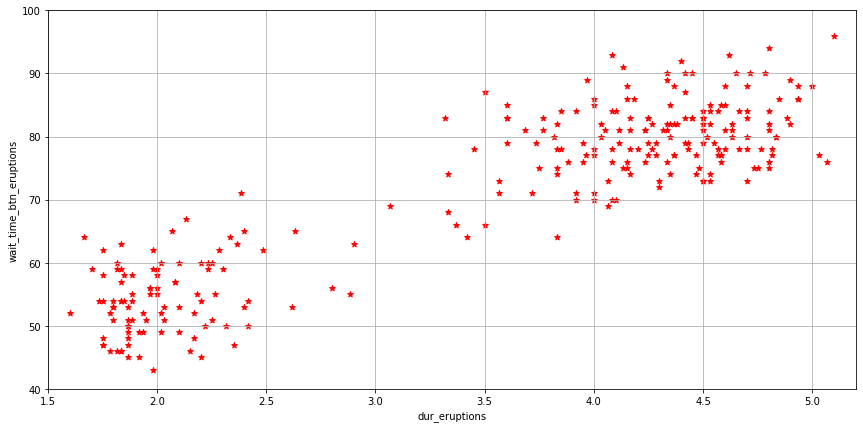

In [2]:
plt.figure(figsize=[12,6])
plt.scatter(df['dur_eruptions'],df['wait_time_btn_eruptions'],marker="*",color="r")
plt.xlabel('dur_eruptions')
plt.ylabel('wait_time_btn_eruptions')
plt.tight_layout()
plt.grid(True)
plt.axis([1.5,5.2,40,100])

# 2. Run the Kmeans algorithm on this dataset(using random). Choose the appropriate number of clusters for this data. What information can you gain from this clustering?

In [3]:
from sklearn.cluster import KMeans

kmeans= KMeans(n_clusters=2, init='random') #2 clusters are formed
y_kmeans = kmeans.fit_predict(df)
# print(y_kmeans)
c= kmeans.cluster_centers_#centroid points
print('Centroids are\n',c)
print("kmeans.inertia:{0}".format(kmeans.inertia_))#sum of squared distance to cluster
print('Clusters are formed in {0} iterations'.format (kmeans.n_iter_))

Centroids are
 [[ 2.09433    54.75      ]
 [ 4.29793023 80.28488372]]
kmeans.inertia:8901.76872094721
Clusters are formed in 5 iterations


# 3. Plot the output of Kmeans, colored according to clusters and obtained centroids. 

[1.5, 5.2, 40, 100]

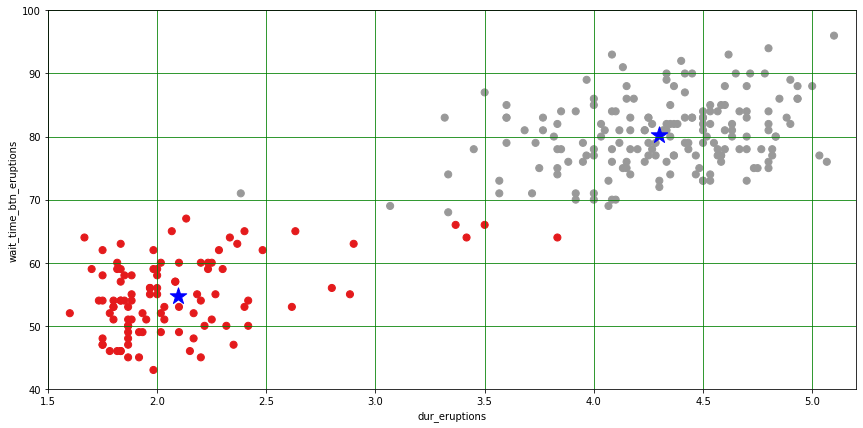

In [4]:
plt.figure(figsize=[12,6])
plt.scatter(df['dur_eruptions'],df['wait_time_btn_eruptions'], c=y_kmeans, s=50, cmap='Set1')
plt.xlabel('dur_eruptions')
plt.ylabel('wait_time_btn_eruptions')
plt.scatter(c[:,0],c[:,1], c='blue', s=300,marker="*")
plt.grid(True,color="g")
plt.tight_layout()
plt.axis([1.5,5.2,40,100])

# 4. For each cluster plot the line from the centroid to the farthest point in the cluster. 

[1.5, 5.2, 40, 100]

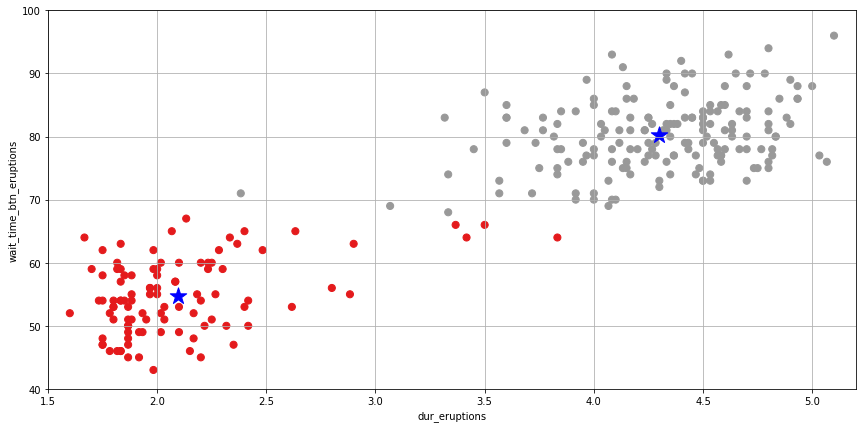

In [5]:
c1_centroid=c[0]
c2_centroid=c[1]
cluster1_points=df[y_kmeans==0]
cluster2_points=df[y_kmeans==1]

cluster1_points[["dur_eruptions","wait_time_btn_eruptions"]]
cluster2_points[["dur_eruptions","wait_time_btn_eruptions"]]

c1_distances=cluster1_points.apply(lambda x: np.sqrt((x[0]-c1_centroid[0])**2 + (x[1]-c1_centroid[1])**2),axis=1)
c2_distances=cluster2_points.apply(lambda x: np.sqrt((x[0]-c2_centroid[0])**2 + (x[1]-c2_centroid[1])**2),axis=1)
# print(c1_distances)
# print(c2_distances)

# X1=[2.133,67]
# c1=[2.09433,54.75]
# X2=[]
# c2=[]

# plt.plot(X1,c1,marker="*",color="b")
# plt.plot(X2,c2,marker="*",color="b")

plt.figure(figsize=[12,6])
plt.scatter(df['dur_eruptions'],df['wait_time_btn_eruptions'], c=y_kmeans, s=50, cmap='Set1')
plt.xlabel('dur_eruptions')
plt.ylabel('wait_time_btn_eruptions')
# plt.plot(X1,c1,color="b")
plt.scatter(c[:,0],c[:,1], c='blue', s=300,marker="*")
plt.grid(True)
plt.tight_layout()
plt.axis([1.5,5.2,40,100])

# print(c1_max)
# print(c2_max)

# 5. Find out all the points in the cluster which have a distance greater than the mean of the cluster. Plot a graph showing them in different color. 

c:\users\yugesh keluskar\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


[1.5, 5.2, 40, 100]

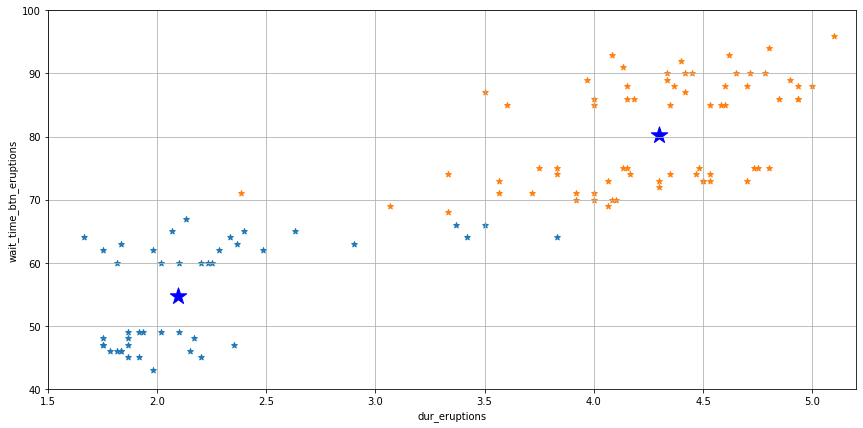

In [6]:
c1_mean=cluster1_points.apply(lambda x: np.sqrt((x[0]-c1_centroid[0])**2 + (x[1]-c1_centroid[1])**2),axis=1).mean()
c2_mean=cluster2_points.apply(lambda x: np.sqrt((x[0]-c2_centroid[0])**2 + (x[1]-c2_centroid[1])**2),axis=1).mean()
# print("Cluster 1 mean is:{0}\nCluster 2 mean is:{1}".format(c1_mean,c2_mean))

greater_mean1=cluster1_points.apply(lambda x: np.sqrt((x[0]-c1_centroid[0])**2 + (x[1]-c1_centroid[1])**2),axis=1)>c1_mean
df["More than mean"]=greater_mean1.apply(lambda x: x==True )
df1= df.dropna(subset = ['More than mean'])
df1.drop(df1[df1['More than mean'] == False].index, inplace=True)
# print("For all the the points in cluster1 greater than mean")
df1

greater_mean2=cluster2_points.apply(lambda x: np.sqrt((x[0]-c2_centroid[0])**2 + (x[1]-c2_centroid[1])**2),axis=1)>c2_mean
df["More than mean"]=greater_mean2.apply(lambda x: x==True )
dfa= df.dropna(subset = ['More than mean'])
dfa.drop(dfa[dfa['More than mean'] == False].index, inplace=True)
# print("For all the the points in cluster2 greater than mean")
dfa

plt.figure(figsize=[12,6])
plt.scatter(df1['dur_eruptions'],df1['wait_time_btn_eruptions'],marker="*")
plt.scatter(dfa['dur_eruptions'],dfa['wait_time_btn_eruptions'],marker="*")
# plt.scatter(df['dur_eruptions'],df['wait_time_btn_eruptions'], c=y_kmeans, s=50, cmap='Set1')
# plt.scatter(df['dur_eruptions'],df['wait_time_btn_eruptions'], c=y_kmeans, s=50, cmap='Set1')
plt.xlabel('dur_eruptions')
plt.ylabel('wait_time_btn_eruptions')
plt.scatter(c[:,0],c[:,1], c='blue', s=300,marker="*")
plt.grid(True)
plt.tight_layout()
plt.axis([1.5,5.2,40,100])

# 6. What is average distance of each cluster? (From the centroid to all points in the cluster)

In [7]:
c1_mean=cluster1_points.apply(lambda x: np.sqrt((x[0]-c1_centroid[0])**2 + (x[1]-c1_centroid[1])**2),axis=1).mean()
c2_mean=cluster2_points.apply(lambda x: np.sqrt((x[0]-c2_centroid[0])**2 + (x[1]-c2_centroid[1])**2),axis=1).mean()
print("Cluster 1 Average is:{0}\nCluster 2 Average is:{1}".format(c1_mean,c2_mean))

Cluster 1 Average is:4.89907876317923
Cluster 2 Average is:4.556493732778596


# 7. For the following points, find out which cluster they fall in?  
dur_eruptions = 2.5, 3.0, 3.2, 4.5, 5.0, 1.5  
wait_time_btn_eruptions = 70, 55, 70, 80, 70, 100  
Plot these points in separate markers & color along with the clusters

In [9]:
pred_dur = [2.5, 3.0, 3.2, 4.5, 5.0, 1.5]
pred_wait = [70, 55, 70, 80, 70, 100]